In [64]:
import numpy as np
import nibabel as nib
import glob
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tifffile import imsave
from sklearn.preprocessing import MinMaxScaler
import random 

In [65]:
scaler = MinMaxScaler()

In [66]:
TRAIN_DATASET_PATH = "/media/maidul/Free Space/MY RESEARCH/ASNR-MICCAI-BraTS2023-GLI-Challenge-TrainingData/"

In [67]:
test_image_flair = nib.load(TRAIN_DATASET_PATH+"BraTS-GLI-00000-000/BraTS-GLI-00000-000-t2f.nii.gz").get_fdata()
print(test_image_flair.shape)
print(test_image_flair.max())

(240, 240, 155)
2934.0


In [68]:
test_image_flair = scaler.fit_transform(test_image_flair.reshape(-1, test_image_flair.shape[-1])).reshape(test_image_flair.shape)
print(test_image_flair.max())
print(test_image_flair.min())

1.0
0.0


In [69]:
test_image_t1 = nib.load(TRAIN_DATASET_PATH+"BraTS-GLI-00000-000/BraTS-GLI-00000-000-t1n.nii.gz").get_fdata()
test_image_t1 = scaler.fit_transform(test_image_t1.reshape(-1, test_image_t1.shape[-1])).reshape(test_image_t1.shape)
print(test_image_t1.max())
print(test_image_t1.min())

1.0
0.0


In [70]:
test_image_t1c = nib.load(TRAIN_DATASET_PATH+"BraTS-GLI-00000-000/BraTS-GLI-00000-000-t1c.nii.gz").get_fdata()
test_image_t1c = scaler.fit_transform(test_image_t1c.reshape(-1, test_image_t1c.shape[-1])).reshape(test_image_t1c.shape)
print(test_image_t1c.max())
print(test_image_t1c.min())

1.0
0.0


In [71]:
test_image_t2 = nib.load(TRAIN_DATASET_PATH+"BraTS-GLI-00000-000/BraTS-GLI-00000-000-t2w.nii.gz").get_fdata()
test_image_t2 = scaler.fit_transform(test_image_t2.reshape(-1, test_image_t2.shape[-1])).reshape(test_image_t2.shape)
print(test_image_t2.max())
print(test_image_t2.min())

1.0
0.0


In [72]:
test_mask = nib.load(TRAIN_DATASET_PATH+"BraTS-GLI-00000-000/BraTS-GLI-00000-000-seg.nii.gz").get_fdata()
test_mask = test_mask.astype(np.uint8)
print(np.unique(test_mask))


[0 1 2 3]


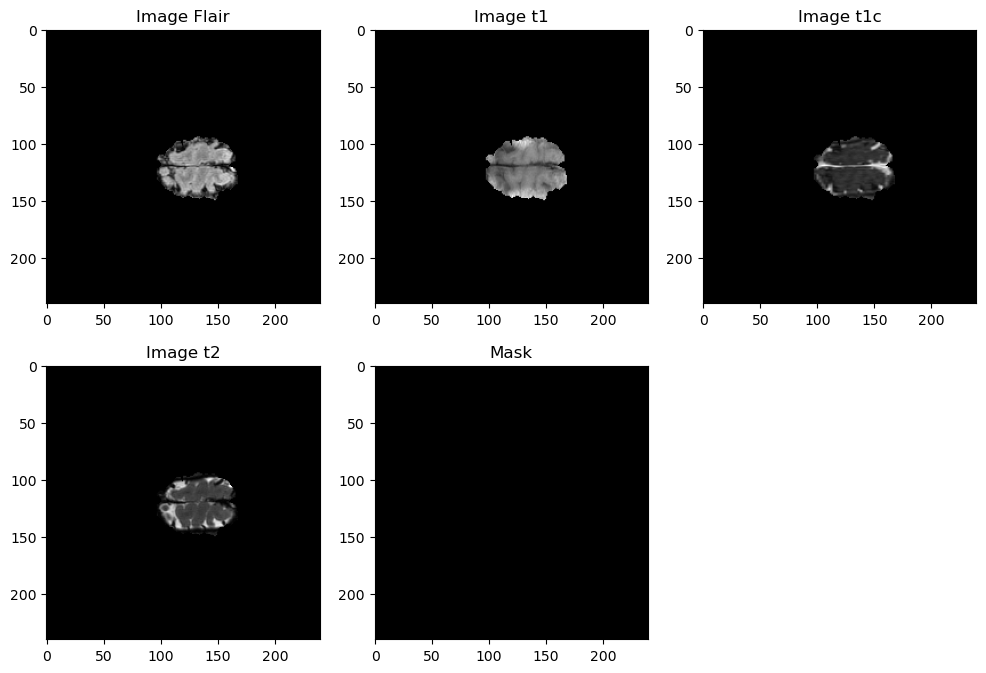

In [73]:
n_slice = random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12,8))

plt.subplot(231)
plt.imshow(test_image_flair[:,:,n_slice], cmap='gray')
plt.title("Image Flair")
           
plt.subplot(232)
plt.imshow(test_image_t1[:,:,n_slice], cmap='gray')
plt.title("Image t1")
           
plt.subplot(233)
plt.imshow(test_image_t1c[:,:,n_slice], cmap='gray')
plt.title("Image t1c")
           
plt.subplot(234)
plt.imshow(test_image_t2[:,:,n_slice], cmap='gray')
plt.title("Image t2")
           
plt.subplot(235)
plt.imshow(test_mask[:,:,n_slice], cmap='gray')
plt.title("Mask")
           
plt.show()

In [74]:
combined_x = np.stack([test_image_flair, test_image_t1c, test_image_t2], axis=3)

In [75]:
combined_x.shape

(240, 240, 155, 3)

In [76]:
combined_x = combined_x[56:184, 56:184, 13:141]
combined_x.shape
test_mask = test_mask[56:184, 56:184, 13:141]
test_mask.shape

(128, 128, 128)

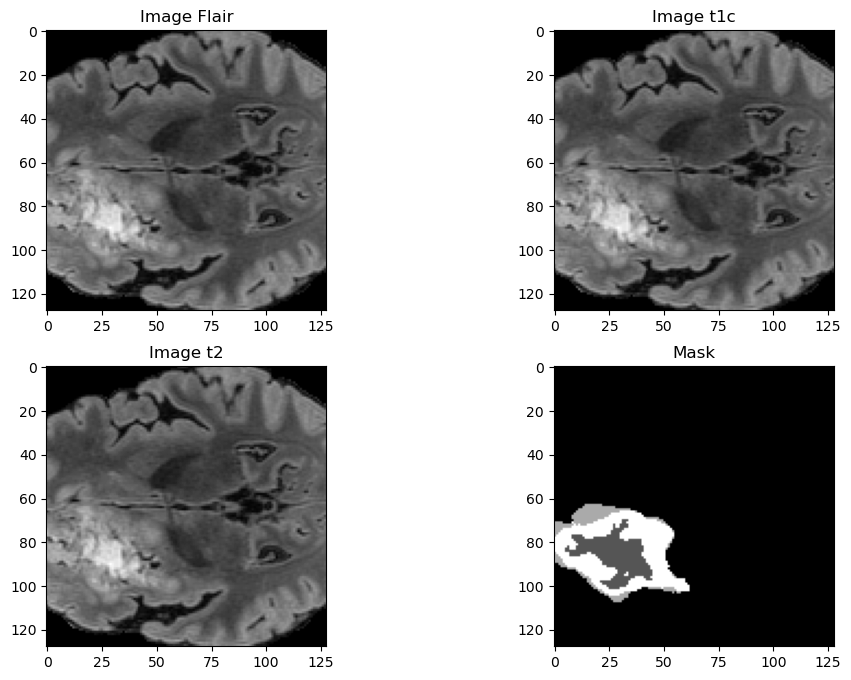

In [98]:
n_slice = random.randint(0, test_mask.shape[2])
plt.figure(figsize=(12,8))

plt.subplot(221)
plt.imshow(combined_x[:,:,n_slice,0], cmap='gray')
plt.title("Image Flair")
           
plt.subplot(222)
plt.imshow(combined_x[:,:,n_slice,0], cmap='gray')
plt.title("Image t1c")
           
plt.subplot(223)
plt.imshow(combined_x[:,:,n_slice,0], cmap='gray')
plt.title("Image t2")
           
plt.subplot(224)
plt.imshow(test_mask[:,:,n_slice], cmap='gray')
plt.title("Mask")

           
plt.show()